In [ ]:
# gdown 설치
!pip install gdown




In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())

Saving filtered_data(저가형)(찐최종).csv to filtered_data(저가형)(찐최종).csv
dict_keys(['filtered_data(저가형)(찐최종).csv'])


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/filtered_data(저가형)(찐최종).csv')

In [ ]:
df.head()

,school_count,academy_count,subway_count,bus_count,apt_count,univ_count,lcom_count,ccom_count,lcafe_count,hcafe_count,centroid,density,density_rank
0,0,0,0,8,0,0,0,0,0,0,POINT (127.071586 37.429794),0,0
1,0,0,0,0,0,0,0,0,1,0,POINT (126.900586 37.432793999999994),1,0
2,0,0,0,4,0,0,0,0,0,0,POINT (126.90358600000002 37.432793999999994),0,0
3,0,0,1,0,0,0,0,0,0,0,POINT (127.12858600000001 37.432793999999994),0,0
4,0,0,0,0,0,0,0,0,0,1,POINT (126.900586 37.435794),0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

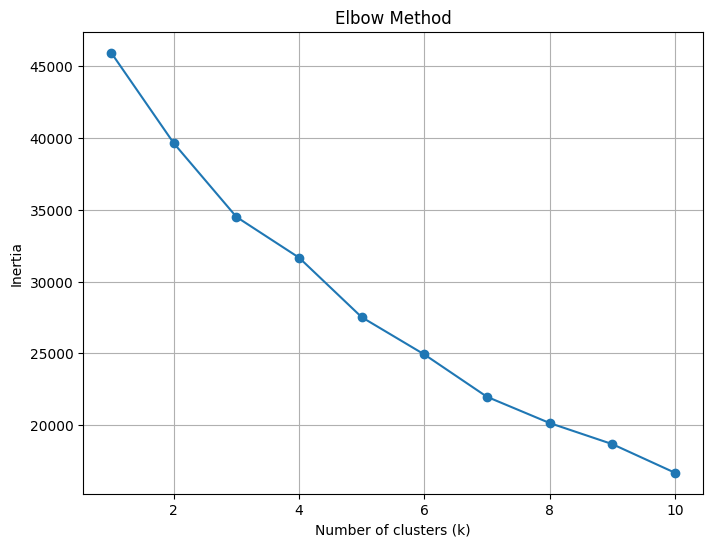

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 제외할 컬럼들
excluded_columns = ['centroid', 'density', 'density_rank', 'univ_count']

# 제외할 컬럼들을 제외한 나머지 컬럼 선택
selected_columns = df.columns.difference(excluded_columns)

# 선택된 컬럼들로 데이터 생성
data = df[selected_columns].to_numpy()

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 최적의 k 찾기 (엘보우 메서드 사용)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

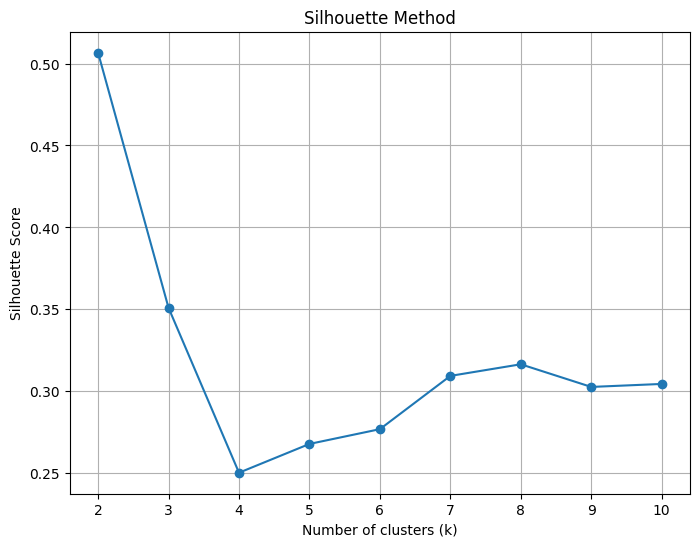

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 저장 리스트
silhouette_scores = []

# K 값을 2부터 10까지 변경하며 실루엣 점수 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 점수 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
# # k=8로 K-Means 클러스터링
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_data)

# # 클러스터 결과 출력
df['Cluster'] = kmeans.labels_
print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   school_count  academy_count  subway_count  bus_count  apt_count  \
0             0              0             0          8          0   
1             0              0             0          0          0   
2             0              0             0          4          0   
3             0              0             1          0          0   
4             0              0             0          0          0   

   univ_count  lcom_count  ccom_count  lcafe_count  hcafe_count  \
0           0           0           0            0            0   
1           0           0           0            1            0   
2           0           0           0            0            0   
3           0           0           0            0            0   
4           0           0           0            0            1   

                                        centroid  density  density_rank  \
0                   POINT (127.071586 37.429794)        0             0   
1          POINT (126.9005

In [ ]:
# 선택된 컬럼명 출력
print("Selected columns:")
print(selected_columns)


Selected columns:
Index(['Cluster', 'academy_count', 'apt_count', 'bus_count', 'ccom_count',
       'hcafe_count', 'lcafe_count', 'lcom_count', 'school_count',
       'subway_count'],
      dtype='object')


        Cluster  academy_count  apt_count  bus_count    ccom_count  \
0  2.769461e+00       8.570359   2.142216  14.537425  2.151057e-16   
1  2.005391e+00       2.469003   0.251123   9.465858 -4.579670e-16   
2 -8.881784e-15       4.617021   0.497872  17.357447  8.510638e-03   
3  3.024209e+00       5.823091   0.510242  13.966480  2.046974e-16   
4  3.000000e+00      79.634146   0.975610  11.804878  1.040834e-17   
5  2.059524e+00       3.943122   0.369048   7.908730  2.220446e-16   
6  4.000000e+00       4.500000   0.550000  14.700000  2.250000e-01   
7  9.782609e-01       2.619565   0.369565  11.358696  1.304348e+00   

   hcafe_count  lcafe_count    lcom_count  school_count  subway_count  cluster  
0     0.155689     0.178144  1.457168e-16  1.991018e-01  2.994012e-03        0  
1     0.150494     0.131177 -3.937822e-16  9.714451e-15 -2.740863e-15        1  
2     0.451064     0.548936  4.857226e-17  1.787234e-01  1.089362e+00        2  
3     0.893855     1.914339  1.335737e-16  2.

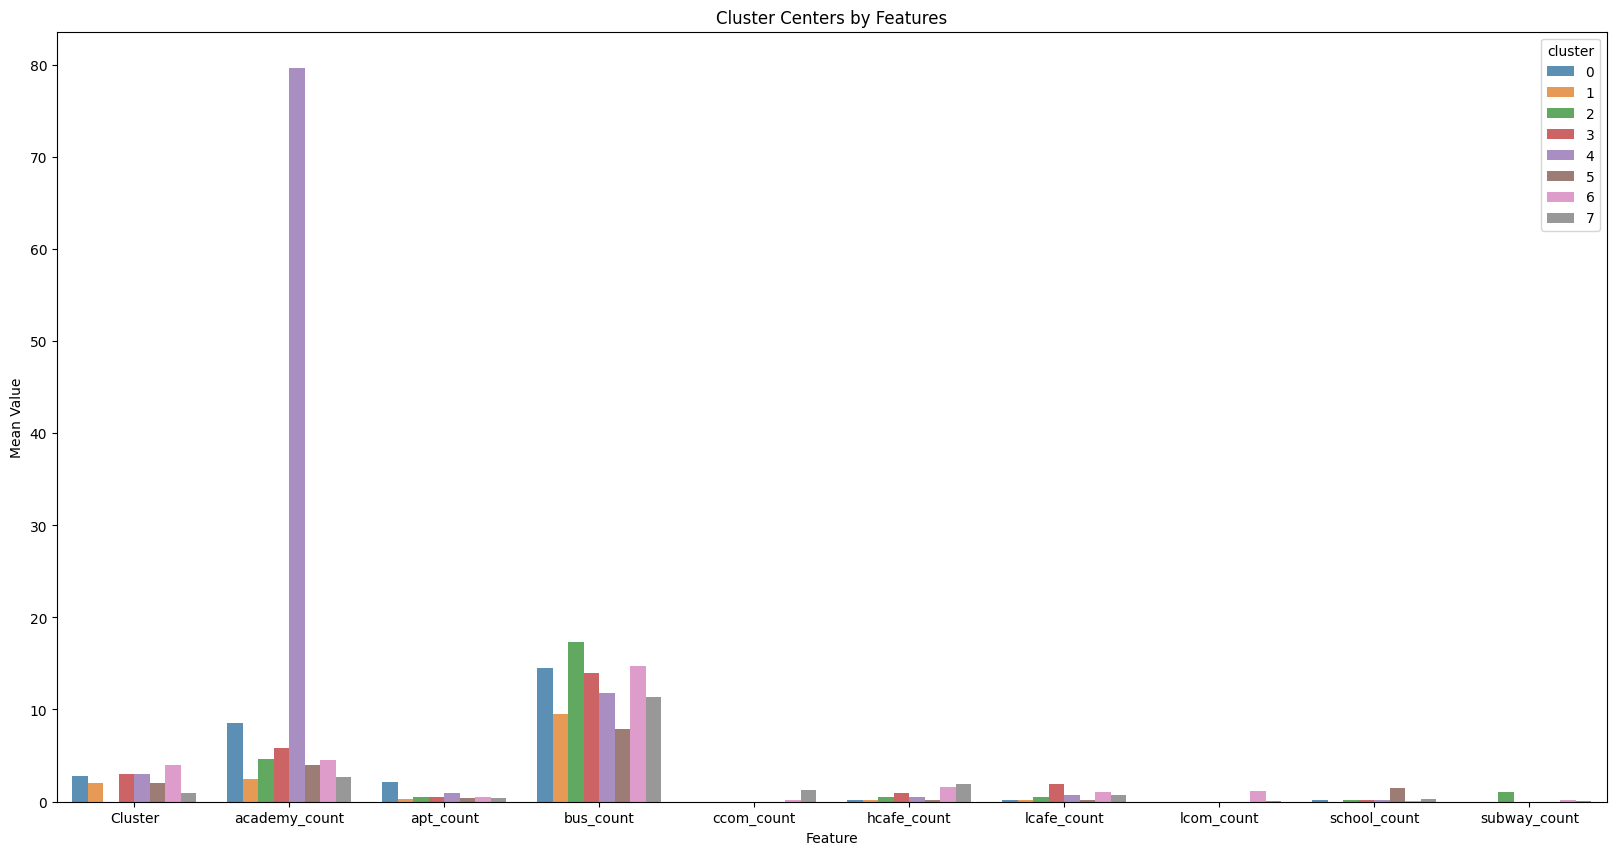

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 클러스터 중심
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
cluster_centers['cluster'] = range(8)
print(cluster_centers)

plt.figure(figsize=(20, 10))

# 막대를 옆으로 나란히 배치하고 투명도 조정
sns.barplot(data=cluster_centers.melt(id_vars='cluster'), x='variable', y='value', hue='cluster', dodge=True, alpha=0.8, palette="tab10")

plt.title('Cluster Centers by Features')
plt.ylabel('Mean Value')
plt.xlabel('Feature')



plt.show()


In [ ]:
# 클러스터별로 그룹화하여 density_rank가 1인 구역의 비율 계산
cluster_density_ratio = df.groupby('Cluster').apply(lambda x: (x['density_rank'] == 1).sum() / len(x))

# 비율이 가장 높은 클러스터 식별
high_density_rank_cluster = cluster_density_ratio.idxmax()

# 결과 출력 (density_rank가 1인 구역의 비율이 가장 높은 클러스터)
print(f"Cluster {high_density_rank_cluster} has the highest proportion of density_rank 1 regions with a ratio of {cluster_density_ratio[high_density_rank_cluster]:.2f}.")

# density가 0이 아닌 데이터를 전체 클러스터 데이터로 나눈 비율 계산
density_nonzero_ratio = df.groupby('Cluster').apply(lambda x: (x['density'] > 0).sum() / len(x))

# 비율이 가장 높은 클러스터 식별
high_density_nonzero_cluster = density_nonzero_ratio.idxmax()

# 결과 출력 (density가 0이 아닌 데이터의 비율이 가장 큰 클러스터)
print(f"Cluster {high_density_nonzero_cluster} has the highest proportion of non-zero density regions with a ratio of {density_nonzero_ratio[high_density_nonzero_cluster]:.2f}.")


Cluster 3 has the highest proportion of density_rank 1 regions with a ratio of 0.19.
Cluster 3 has the highest proportion of non-zero density regions with a ratio of 0.96.


In [ ]:
# 클러스터와 density 별로 그룹화하여 개수 계산
density_counts_per_cluster = df.groupby('Cluster')['density'].value_counts().unstack().fillna(0)

# 결과 출력
print("Density counts per cluster:")
print(density_counts_per_cluster)

# 각 클러스터에 속한 데이터의 총 개수 계산
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'total_count']

print(cluster_counts)

Density counts per cluster:
density       0      1      2     3     4    5    6
Cluster                                            
0         558.0   99.0   10.0   0.0   0.0  0.0  0.0
1        1934.0  292.0    0.0   0.0   0.0  0.0  0.0
2         151.0   52.0   21.0   9.0   2.0  0.0  0.0
3          20.0  151.0  262.0  73.0  22.0  8.0  1.0
4          28.0    4.0    4.0   2.0   2.0  1.0  0.0
5         650.0   97.0    9.0   0.0   1.0  0.0  0.0
6          15.0   13.0    9.0   2.0   1.0  0.0  0.0
7          58.0   17.0   10.0   5.0   1.0  1.0  0.0
   Cluster  total_count
0        1         2226
1        5          757
2        0          667
3        3          537
4        2          235
5        7           92
6        4           41
7        6           40


In [ ]:
import pandas as pd
from google.colab import files

# 클러스터 2에 속하면서 density가 0인 데이터 필터링
cluster_3_density_0 = df[(df['Cluster'] == 3) & (df['density'] == 0)]

# 해당 데이터들의 centroid 값 출력
centroid_values = cluster_3_density_0['centroid']
print("Centroid values for data in Cluster 3 with density equal to 0:")
print(centroid_values)

# 필요한 열만 선택하고 density를 기준으로 정렬
cluster_3_sorted = cluster_3_density_0[['centroid', 'density']].sort_values(by='density')

# 엑셀 파일로 저장
output_file_path = 'cluster_3_sorted.xlsx'
cluster_3_sorted.to_excel(output_file_path, index=False)

# 파일 다운로드
files.download(output_file_path)


Centroid values for data in Cluster 3 with density equal to 0:
400                      POINT (126.957586 37.477794)
414              POINT (126.99958600000001 37.477794)
1118            POINT (126.852586 37.501794000000004)
1246    POINT (126.94858599999999 37.504794000000004)
1641             POINT (127.13458599999998 37.516794)
2206             POINT (126.94858599999999 37.540794)
2270                     POINT (126.846586 37.543794)
2785    POINT (126.99658600000002 37.558794000000006)
2956     POINT (126.94258599999999 37.56479399999999)
2959     POINT (126.95458599999999 37.56479399999999)
3345                     POINT (126.924586 37.579794)
3348             POINT (126.93358599999999 37.579794)
3396                     POINT (126.885586 37.582794)
3418             POINT (126.96958599999999 37.582794)
3478     POINT (126.94858599999999 37.58579399999999)
3518     POINT (127.09858600000001 37.58579399999999)
3597     POINT (126.96358599999999 37.59179399999999)
3620             PO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>